In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlpgw

%matplotlib notebook

In [2]:
# Dowload the model
model = mlpgw.load_obj('../data/model')

In [3]:
# Define waveform parameters
m1 = 16
m2 = 4
s1z = 0.5
s2z = 0.8
distance = 400
phi = np.pi/4
inclination = np.pi/3

# Make prediction
h_pred = model.predict(m1=m1, m2=m2, s1z=s1z, s2z=s2z, distance=distance, phi=phi, inclination=inclination)

In [4]:
# Plot it
plt.figure()
plt.plot(h_pred['time'], h_pred['hp'], label=r'$h_+$')
plt.plot(h_pred['time'], h_pred['hc'], label=r'$h_\times$')
plt.xlabel('t (s)')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

In [5]:
# Simulation with SEOBNRv4
h = mlpgw.CompactBinary(m1=m1, m2=m2, s1z=s1z, s2z=s2z).get_waveform(distance=distance, phi=phi, inclination=inclination)

In [6]:
# Crop time axis
#indices = (h['time']>=np.min(h_pred['time'])) * (h['time']<=np.max(h_pred['time']))
#h['hp'] = h['hp'][indices]
#h['hc'] = h['hc'][indices]
#h['time'] = h['time'][indices]

resampler = mlpgw.Transformer(name='resample', new_time=h_pred['time'])
h = resampler.transform(**h)

<IPython.core.display.Javascript object>


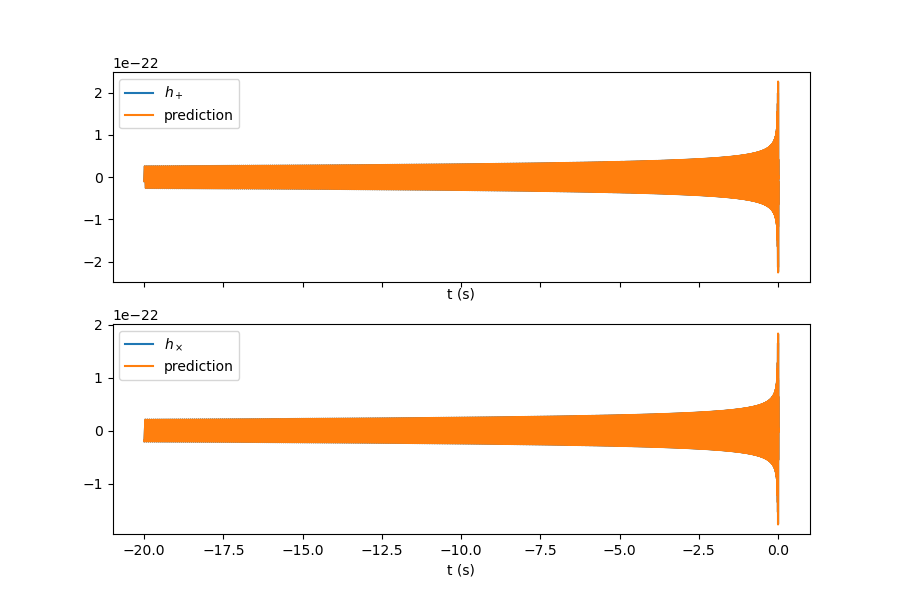

In [7]:
# Plot difference
fig, axes = plt.subplots(2, figsize=(9, 3*2), sharex=True)
axes[0].plot(h['time'], h['hp'], label=r'$h_+$')
axes[0].plot(h_pred['time'], h_pred['hp'], label='prediction')
axes[1].plot(h['time'], h['hc'], label=r'$h_\times$')
axes[1].plot(h_pred['time'], h_pred['hc'], label='prediction')
for ax in axes:
    ax.set_xlabel('t (s)')
    ax.legend()
plt.show()

In [8]:
# Compute the mismatch
print("Mismatch metric: {}".format(1-mlpgw._match_metric(h, h_pred)))

Mismatch metric: 4.864373269852784e-06
